In [24]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [25]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

matplotlib.rc('font', size=SMALL_SIZE)          # controls default text sizes
matplotlib.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## 1. Ват-Ваттная характеристика

In [26]:
data1 = pd.read_excel('data/data1.xlsx')
data1.head()

,Unnamed: 0,зеленный,светодоид,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,накачка,NaN,выход,NaN,"W, мватт",NaN,NaN,NaN,NaN,NaN
1,NaN,"V, В","I, мА","I, мкА",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2.44,0.14,0.199,NaN,2.58,NaN,NaN,NaN,NaN,NaN
3,NaN,2.58,0.52,0.74,NaN,3.1,NaN,NaN,NaN,NaN,NaN
4,NaN,2.66,1.04,1.43,NaN,3.7,NaN,NaN,NaN,NaN,NaN


In [111]:
P_green_led = data1['Unnamed: 5'][2:15]  # mW
I_green_led = data1['Unnamed: 3'][2:15]  # mkA

P_red_led = data1['Unnamed: 5'][17:25]
I_red_led = data1['Unnamed: 3'][17:25]

P_blue_led = data1['Unnamed: 5'][31:37]
I_blue_led = data1['Unnamed: 3'][31:37]

P_lazer1 = data1['Unnamed: 5'][40:46]
I_lazer1 = data1['Unnamed: 3'][40:46]

P_lazer2 = data1['Unnamed: 8'][40:45]*data1['Unnamed: 9'][40:45]
I_lazer2 = data1['Unnamed: 10'][40:45]

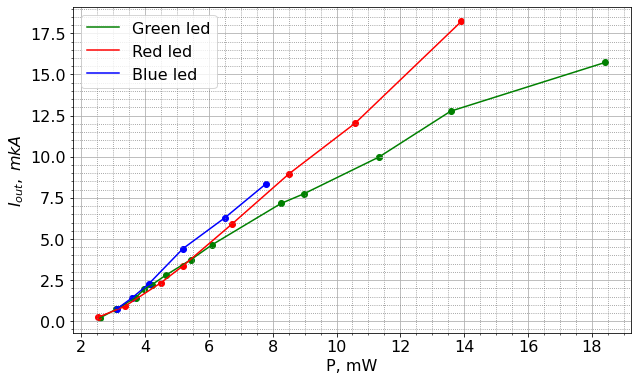

In [42]:
plt.figure(figsize=(10,6))

plt.plot(P_green_led, I_green_led, label='Green led', c='green')
plt.scatter(P_green_led, I_green_led, c='green')
plt.plot(P_red_led, I_red_led, label='Red led', c='red')
plt.scatter(P_red_led, I_red_led, c='red')
plt.plot(P_blue_led, I_blue_led, label='Blue led', c='blue')
plt.scatter(P_blue_led, I_blue_led, c='blue')

plt.xlabel('P, mW')
plt.ylabel(r'$I_{out},\; mkA$')

plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='gray')

plt.legend()

plt.savefig('pictures/WW-leds.png', dpi=600)

plt.show()

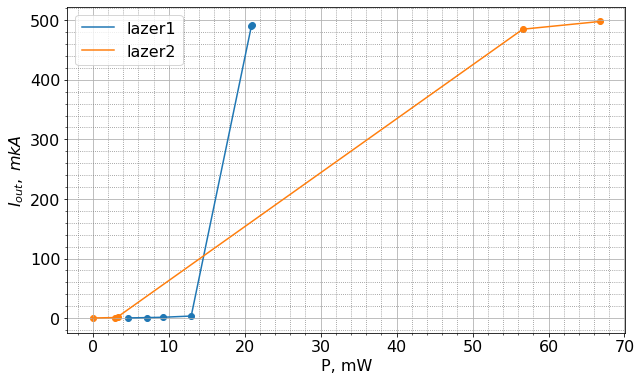

In [112]:
plt.figure(figsize=(10,6))


plt.plot(P_lazer1, I_lazer1, label='lazer1')
plt.scatter(P_lazer1, I_lazer1)
plt.plot(P_lazer2, I_lazer2, label='lazer2')
plt.scatter(P_lazer2, I_lazer2)

plt.xlabel('P, mW')
plt.ylabel(r'$I_{out},\; mkA$')

plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='gray')

plt.legend()

plt.savefig('pictures/WW-laz.png', dpi=600)

plt.show()

## 2. Спектр

In [130]:
data2 = pd.read_excel('data/data2.xlsx', sheet_name=1)
data2.head()


,Tаблица 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,"Lambda, nm","U, V",Ipump*Upump,"Lambda, nm","U, V",Ipump*Upump,"Lambda, nm blue led","U, V",Ipump*Upump,...,Ipump*Upump,"Lambda, nm, red led","U, V",Ipump*Upump,"Lambda, nm, red led","U, V",Ipump*Upump,"Lambda, nm, green led","U, V",Ipump*Upump
1,NaN,622,0.05,"13,72*2,21 (mA*V)",610,0.067,"15,8*2,25 (mA*V)",425,0.026,"1,87*3,78 (mA*V)",...,5*2(mA*V),560,0.13,"12,4*4,3(mA*V)",570,0.011,"6,7*3,9(mA*V)",600,0.004,3.64(mA) * 2.79(V)
2,NaN,625,0.09,NaN,615,0.107,NaN,430,0.065,NaN,...,NaN,590,0.245,NaN,575,0.023,NaN,595,0.006,NaN
3,NaN,627,0.13,NaN,620,0.177,NaN,435,0.153,NaN,...,NaN,600,0.6,NaN,580,0.041,NaN,590,0.01,NaN
4,NaN,630,0.25,NaN,625,0.372,NaN,440,0.353,NaN,...,NaN,610,1.26,NaN,585,0.075,NaN,585,0.015,NaN


In [179]:
l1 = [float(i) for i in data2['Unnamed: 1'][1:].dropna()]
u1 = [float(i) for i in list(data2['Unnamed: 2'].dropna())[1:]]
p1 = eval(data2['Unnamed: 3'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l2 = [float(i) for i in data2['Unnamed: 4'][1:].dropna()]
u2 = [float(i) for i in list(data2['Unnamed: 5'].dropna())[1:]]
p2 = eval(data2['Unnamed: 6'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l_b_led = [float(i) for i in data2['Unnamed: 7'][1:].dropna()]
u_b_led = [float(i) for i in list(data2['Unnamed: 8'].dropna())[1:]]
p_b_led = eval(data2['Unnamed: 9'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l_r = [float(i) for i in data2['Unnamed: 10'][1:].dropna()]
u_r = [float(i) for i in list(data2['Unnamed: 11'].dropna())[1:]]
p_r = eval(data2['Unnamed: 12'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l_r_las = [float(i) for i in data2['Unnamed: 13'][1:].dropna()]
u_r_las = [float(i) for i in list(data2['Unnamed: 14'].dropna())[1:]]
p_r_las = eval(data2['Unnamed: 15'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l_r_led2 = [float(i) for i in data2['Unnamed: 16'][1:].dropna()]
u_r_led2 = [float(i) for i in list(data2['Unnamed: 17'].dropna())[1:]]
p_r_led2= eval(data2['Unnamed: 18'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l_r_led = [float(i) for i in data2['Unnamed: 19'][1:].dropna()]
u_r_led = [float(i) for i in list(data2['Unnamed: 20'].dropna())[1:]]
p_r_led= eval(data2['Unnamed: 21'][1].split('(mA*V)')[0].replace(',', '.'))  # mW

l_g_led = [float(i) for i in data2['Unnamed: 22'][1:].dropna()]
u_g_led = [float(i) for i in list(data2['Unnamed: 23'].dropna())[1:]]
p_g_led = 3.64 * 2.79


### Leds

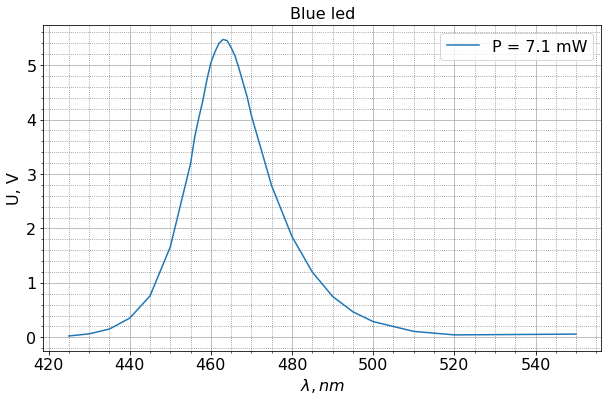

In [203]:
plt.figure(figsize=(10,6))

plt.plot(l_b_led, u_b_led, label=f"P = {round(p_b_led, 1)} mW")
    
plt.ylabel('U, V')
plt.xlabel(r'$\lambda, nm$')
plt.title('Blue led')
    
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='gray')

plt.legend()

plt.savefig('pictures/spectr_blue_led.png', dpi=600)

plt.show()

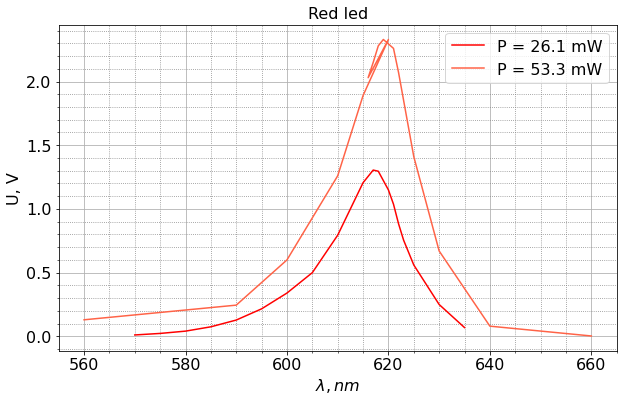

In [205]:
plt.figure(figsize=(10,6))

plt.plot(l_r_led, u_r_led, label=f"P = {round(p_r_led, 1)} mW", color='red')
plt.plot(l_r_led2, u_r_led2, label=f"P = {round(p_r_led2, 1)} mW", color='tomato')
    
plt.ylabel('U, V')
plt.xlabel(r'$\lambda, nm$')
plt.title('Red led')
    
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='gray')

plt.legend()
plt.savefig('pictures/spectr_red_led.png', dpi=600)
plt.show()

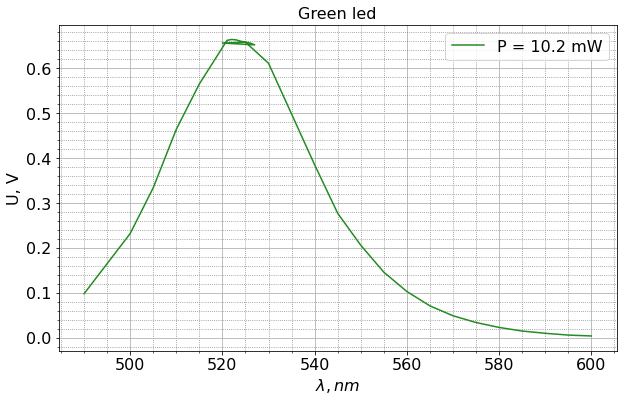

In [206]:
plt.figure(figsize=(10,6))

plt.plot(l_g_led, u_g_led, label=f"P = {round(p_g_led, 1)} mW", c='forestgreen')
    
plt.ylabel('U, V')
plt.xlabel(r'$\lambda, nm$')
plt.title('Green led')
    
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='gray')

plt.legend()
plt.savefig('pictures/spectr_green_led.png', dpi=600)
plt.show()

### Lasers

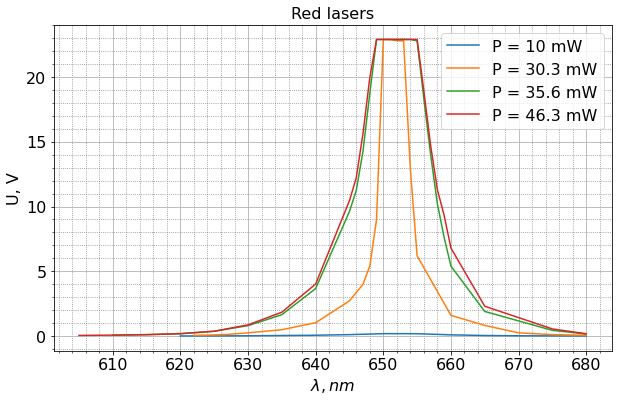

In [202]:
plt.figure(figsize=(10,6))

plt.plot(l_r_las, u_r_las, label=f"P = {round(p_r_las, 1)} mW")
plt.plot(l1, u1, label=f"P = {round(p1, 1)} mW")
plt.plot(l2, u2, label=f"P = {round(p2, 1)} mW")
plt.plot(l_r, u_r, label=f"P = {round(p_r, 1)} mW")
    
plt.ylabel('U, V')
plt.xlabel(r'$\lambda, nm$')
plt.title('Red lasers')
    
plt.grid()
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='gray')

plt.legend()
plt.savefig('pictures/spectr_blue_led.png', dpi=600)
plt.show()